# Comparing RNN models on financial data


### Getting the data

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [ ]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

def preprocess(dataset):
   # Scaling the set
   sc = MinMaxScaler(feature_range=(0,1))
   set_scaled = sc.fit_transform(dataset)

   # Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
   # So for each element of training set, we have 60 previous training set elements 
   X = []
   y = []
   for i in range(60,len(dataset)):
        X.append(set_scaled[i-60:i,0])
        y.append(set_scaled[i,0])

   X, y = np.array(X), np.array(y)

   # Reshaping X for efficient modelling
   X = np.reshape(X, (X.shape[0], X.shape[1], 1))

   return X, y, sc

In [ ]:
# First, we get the data
dataset = pd.read_csv('https://raw.githubusercontent.com/BadreddineDS/Data_Analysis/master/Dataset/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [ ]:
# Checking for missing values
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

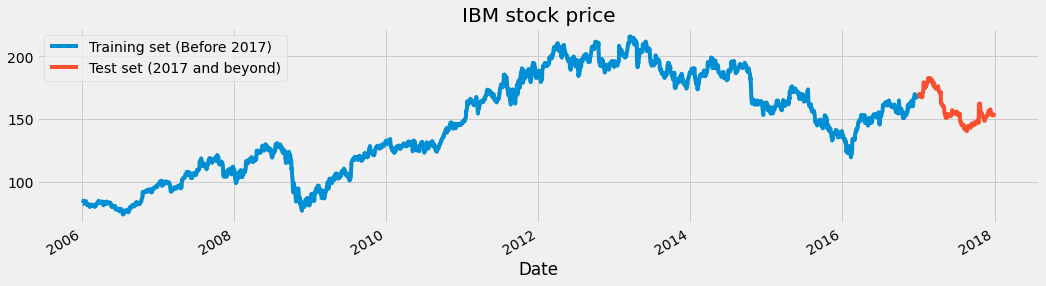

In [ ]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

# Experimental comparison

1. Perform learning and plot the predictions of a few learned models        
     

In [ ]:
from keras import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional, SimpleRNN
from keras.optimizers import SGD

The root mean squared error is 0.04335424455003662.
rmse : 0.04335424455003662


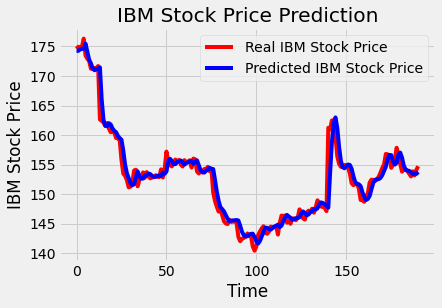

In [ ]:
# The LSTM architecture
def lstm_model():
  regressor = Sequential()
  regressor.add(LSTM(units=10, return_sequences=True, input_shape=(X_train.shape[1],1)))
  #regressor.add(Dropout(0.2))
  regressor.add(LSTM(units=10))
  #regressor.add(Dropout(0.2))
  regressor.add(Dense(units=1))
  # Compiling the RNN
  regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
  # Fitting to the training set
  return regressor

# preprocessing training set
X_train, y_train, train_sc = preprocess(training_set)

regressor = lstm_model()

# Fitting to the training set
regressor.fit(X_train,y_train,epochs=60,batch_size=64, verbose=0)

# preprocessing test set
X_test, y_test, test_sc = preprocess(test_set)

# predict y_test 
predicted = regressor.predict(X_test)

# compute rmse
print('rmse :', return_rmse(y_test, predicted))

# rescale prediction
predicted = test_sc.inverse_transform(predicted)

# plot prediction vs true 
plot_predictions(test_set[60:], predicted)

The root mean squared error is 0.042201586574089484.
rmse : 0.042201586574089484


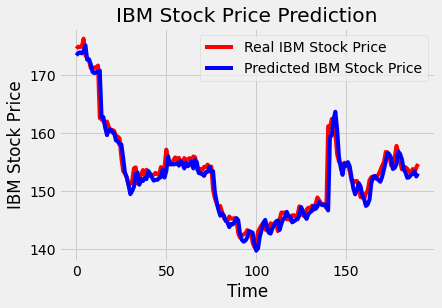

In [ ]:
# Simple RNN architecture
def simpleRNN_model():
  regressor = Sequential()
  regressor.add(SimpleRNN(units=10, return_sequences=True, input_shape=(X_train.shape[1],1)))
  #regressor.add(Dropout(0.2))
  regressor.add(SimpleRNN(units=10))
  #regressor.add(Dropout(0.2))
  regressor.add(Dense(units=1))

  # Compiling the RNN
  regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
  # Fitting to the training set
  return regressor


regressor = simpleRNN_model()
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=60,batch_size=64, verbose=0)

# preprocessing test set
X_test, y_test, test_sc = preprocess(test_set)

# predict y_test 
predicted = regressor.predict(X_test)

# compute rmse
print('rmse :', return_rmse(y_test, predicted))

# rescale prediction
predicted = test_sc.inverse_transform(predicted)

# plot prediction vs true value
plot_predictions(test_set[60:], predicted)

(191, 1)
The root mean squared error is 0.039213112444237835.


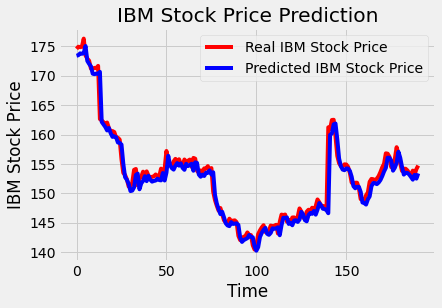

In [ ]:
# GRU architecture
def GRU_model():
  regressor = Sequential()
  regressor.add(GRU(units=10, return_sequences=True, input_shape=(X_train.shape[1],1)))
  #regressor.add(Dropout(0.2))
  regressor.add(GRU(units=10))
  #regressor.add(Dropout(0.2))
  regressor.add(Dense(units=1))
  # Compiling the RNN
  regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
  return regressor


regressor = GRU_model()
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=60,batch_size=64, verbose=0)

# preprocessing test set
X_test, y_test, test_sc = preprocess(test_set)

# predict y_test 
predicted = regressor.predict(X_test)

print(np.shape(predicted))
# compute rmse
return_rmse(y_test, predicted)

# rescale prediction
predicted = test_sc.inverse_transform(predicted)

#plot prediction vs true value
plot_predictions(test_set[60:], predicted)

2. Extensive comparison

Compare SimpleRNN, GRU NNs, LSTM NNs in terms of performance (mse) vs number of parameters for a variery of models while tryoing to get the best performance for a given budget measured as the number of parameters.


In [ ]:
def get_regressor(X_train, layer_nb, units_nb, model):

    units_per_layer = int(units_nb/layer_nb)
    regressor = Sequential()

    if(model == 'GRU'):

        for i in range(layer_nb):
            if(i==0 and layer_nb==1):
                regressor.add(GRU(units=units_per_layer, input_shape=(X_train.shape[1],1)))
                #regressor.add(Dropout(0.2))
                break

            if(i==0 and layer_nb!=1):
                regressor.add(GRU(units=units_per_layer, return_sequences=True, input_shape=(X_train.shape[1],1)))

            elif(i==(layer_nb-1)):
                regressor.add(GRU(units=units_per_layer))
                #regressor.add(Dropout(0.2))
            else:
                regressor.add(GRU(units=units_per_layer, return_sequences=True))
                #regressor.add(Dropout(0.2))
    
    
    elif(model == 'LSTM'):
        for i in range(layer_nb):
            if(i==0 and layer_nb==1):
                regressor.add(LSTM(units=units_per_layer, input_shape=(X_train.shape[1],1)))
                #regressor.add(Dropout(0.2))
                break

            if(i==0 and layer_nb!=1):
                regressor.add(LSTM(units=units_per_layer, return_sequences=True, input_shape=(X_train.shape[1],1)))

            elif(i==(layer_nb-1)):
                regressor.add(LSTM(units=units_per_layer))
                #regressor.add(Dropout(0.2))
            else:
                regressor.add(LSTM(units=units_per_layer, return_sequences=True))
                #regressor.add(Dropout(0.2))
    
    
    elif(model == 'SimpleRNN'):
        for i in range(layer_nb):
            if(i==0 and layer_nb==1):
                regressor.add(SimpleRNN(units=units_per_layer, input_shape=(X_train.shape[1],1)))
                #regressor.add(Dropout(0.2))
                break

            if(i==0 and layer_nb!=1):
                regressor.add(SimpleRNN(units=units_per_layer, return_sequences=True, input_shape=(X_train.shape[1],1)))

            elif(i==(layer_nb-1)):
                regressor.add(SimpleRNN(units=units_per_layer))
                #regressor.add(Dropout(0.2))
            else:
                regressor.add(SimpleRNN(units=units_per_layer, return_sequences=True))
                #regressor.add(Dropout(0.2))



    regressor.add(Dense(units=1))
    # Compiling the RNN
    regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
    return regressor


"""

X_train, y_train, train_sc = preprocess(training_set)
X_test, y_test, test_sc = preprocess(test_set)

regressor = get_regressor(X_train, layer_nb=1, units_nb=10, model='SimpleRNN')
regressor.fit(X_train, y_train, epochs=10, batch_size=64)

regressor.summary()

predicted = regressor.predict(X_test)
rmse_results.append(return_rmse(y_test, predicted))

"""


"\n\nX_train, y_train, train_sc = preprocess(training_set)\nX_test, y_test, test_sc = preprocess(test_set)\n\nregressor = get_regressor(X_train, layer_nb=1, units_nb=10, model='SimpleRNN')\nregressor.fit(X_train, y_train, epochs=10, batch_size=64)\n\nregressor.summary()\n\npredicted = regressor.predict(X_test)\nrmse_results.append(return_rmse(y_test, predicted))\n\n"

In [ ]:
import tensorflow as tf
from tqdm import tqdm

layer_nb = np.arange(1, 4)
units_nb = np.arange(10, 100, 20)
rmse_results = []
param_nb = []
models = ['SimpleRNN', 'LSTM', 'GRU']

X_train, y_train, train_sc = preprocess(training_set)
X_test, y_test, test_sc = preprocess(test_set)



for model in tqdm(models):
    for layer in layer_nb:
        for units in units_nb:

            regressor = get_regressor(X_train=X_train, layer_nb=layer, units_nb=units, model=model)
            regressor.fit(X_train, y_train, epochs=20, batch_size=64, verbose=0)
            predicted = regressor.predict(X_test)
            
            param_nb.append(regressor.count_params())
            rmse_results.append(return_rmse(y_test, predicted))
            tf.keras.backend.clear_session


np.save('rmse_results.npy', np.asarray(rmse_results))
np.save('param_nb.npy', np.asarray(param_nb))





  0%|          | 0/3 [00:00<?, ?it/s]

The root mean squared error is 0.05047241705498998.
The root mean squared error is 0.042096326177580946.
The root mean squared error is 0.038168823382068645.
The root mean squared error is 0.03929562659793356.
The root mean squared error is 0.0382290718529024.
The root mean squared error is 0.048359934437573804.
The root mean squared error is 0.045823003946944024.
The root mean squared error is 0.04108555753371404.
The root mean squared error is 0.04019900022664236.
The root mean squared error is 0.0402478842312058.
The root mean squared error is 0.06208519162670716.
The root mean squared error is 0.06398476659447255.
The root mean squared error is 0.04996653341094809.
The root mean squared error is 0.088867752152367.





 33%|███▎      | 1/3 [22:05<44:11, 1325.97s/it]

The root mean squared error is 0.06640745587771238.
The root mean squared error is 0.059479665513276506.
The root mean squared error is 0.04736948058584766.
The root mean squared error is 0.052796364828048774.
The root mean squared error is 0.046628073303706365.
The root mean squared error is 0.047334510494755955.
The root mean squared error is 0.09828409356914444.
The root mean squared error is 0.06236946070855905.
The root mean squared error is 0.06001584669666319.
The root mean squared error is 0.05866433960696879.
The root mean squared error is 0.056045773456453056.
The root mean squared error is 0.10569327499945463.
The root mean squared error is 0.09855658153367441.
The root mean squared error is 0.08793960125053416.
The root mean squared error is 0.0695296901438338.





 67%|██████▋   | 2/3 [28:44<17:27, 1047.77s/it]

The root mean squared error is 0.07459974385666253.
The root mean squared error is 0.047987682024970536.
The root mean squared error is 0.0410134425502968.
The root mean squared error is 0.04089823306432763.
The root mean squared error is 0.039958374241217454.
The root mean squared error is 0.03957838289398539.
The root mean squared error is 0.03865241487718005.
The root mean squared error is 0.04356605686395376.
The root mean squared error is 0.04298067689244551.
The root mean squared error is 0.037261393563641304.
The root mean squared error is 0.05375293076501711.
The root mean squared error is 0.047862890160776994.
The root mean squared error is 0.05146459349742492.
The root mean squared error is 0.039885289702195036.
The root mean squared error is 0.045922154001342586.





100%|██████████| 3/3 [35:12<00:00, 704.21s/it]

The root mean squared error is 0.039577315402158156.


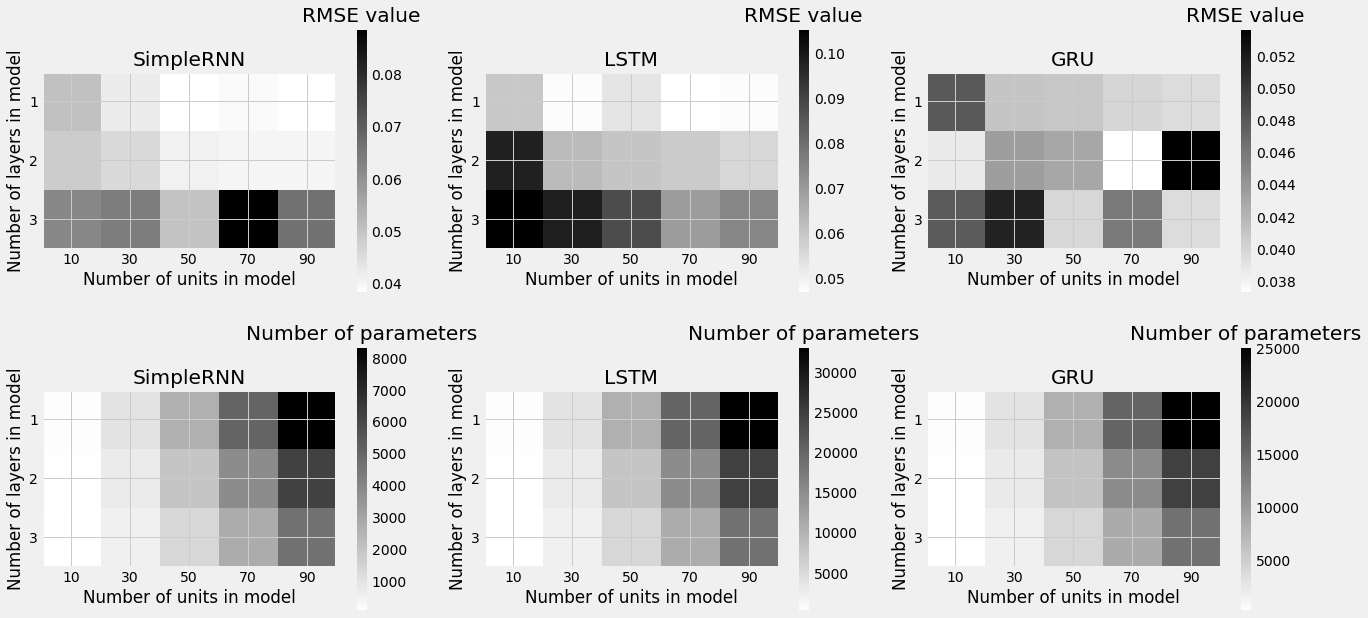

In [ ]:
results = np.reshape(rmse_results,(3, 3, 5))
params = np.reshape(param_nb,(3, 3, 5))

#reshape results
plt.figure(1, figsize=(20, 10))
plt.subplot(231)
color_map = plt.cm.get_cmap('binary')
plt.imshow(results[0], cmap=color_map)
plt.xticks(np.arange(5), ('10', '30', '50', '70', '90'))
plt.yticks(np.arange(3), ('1', '2', '3'))
plt.xlabel('Number of units in model')
plt.ylabel('Number of layers in model')
clb = plt.colorbar()
clb.ax.set_title('RMSE value')
plt.title("SimpleRNN")
#plt.show()


plt.subplot(234)
#reversed_color_map = color_map.reversed()
plt.imshow(params[0], cmap=color_map)
plt.xticks(np.arange(5), ('10', '30', '50', '70', '90'))
plt.yticks(np.arange(3), ('1', '2', '3'))
plt.xlabel('Number of units in model')
plt.ylabel('Number of layers in model')
clb = plt.colorbar()
clb.ax.set_title('Number of parameters')
plt.title("SimpleRNN")
#plt.show()

plt.subplot(232)
color_map = plt.cm.get_cmap('binary')
plt.imshow(results[1], cmap=color_map)
plt.xticks(np.arange(5), ('10', '30', '50', '70', '90'))
plt.yticks(np.arange(3), ('1', '2', '3'))
plt.xlabel('Number of units in model')
plt.ylabel('Number of layers in model')
clb = plt.colorbar()
clb.ax.set_title('RMSE value')
plt.title("LSTM")
#plt.show()


plt.subplot(235)
#reversed_color_map = color_map.reversed()
plt.imshow(params[1], cmap=color_map, )
plt.xticks(np.arange(5), ('10', '30', '50', '70', '90'))
plt.yticks(np.arange(3), ('1', '2', '3'))
plt.xlabel('Number of units in model')
plt.ylabel('Number of layers in model')
clb = plt.colorbar()
clb.ax.set_title('Number of parameters')
plt.title("LSTM")
#plt.show()

plt.subplot(233)
color_map = plt.cm.get_cmap('binary')
plt.imshow(results[2], cmap=color_map)
plt.xticks(np.arange(5), ('10', '30', '50', '70', '90'))
plt.yticks(np.arange(3), ('1', '2', '3'))
plt.xlabel('Number of units in model')
plt.ylabel('Number of layers in model')
clb = plt.colorbar()
clb.ax.set_title('RMSE value')
plt.title("GRU")
#plt.show()


plt.subplot(236)
#reversed_color_map = color_map.reversed()
plt.imshow(params[2], cmap=color_map, )
plt.xticks(np.arange(5), ('10', '30', '50', '70', '90'))
plt.yticks(np.arange(3), ('1', '2', '3'))
plt.xlabel('Number of units in model')
plt.ylabel('Number of layers in model')
clb = plt.colorbar()
clb.ax.set_title('Number of parameters')
plt.title("GRU")
plt.show()

Can you find a clear ranking of the three families of models ? 
3. Can these models be trained to perform prediction at a longer range ? For instance predicting the values of one full week ahead (the next 7 days) instead of predicting the value for the next only ?  

In [ ]:
# Method 1: using current models, we inject the prediction in the test_set 
# and run a second prediction using the new test_set for each day. 

# starting from
    
def stupid_predictor(X_test, regressor):    
    predictions = np.empty((len(X_test), 7))   
    
    for i in range(len(X_test)):
        start = X_test[i]
        week = []
        for j in range(7):
 
            predicted = regressor.predict(np.reshape(start[j:j+60], (1, 60, 1)))
            start = np.append(start, np.reshape(predicted, (1,1)))
            week.append(predicted)
        
        predictions[i] = week 

    return predictions

X_train, y_train, train_sc = preprocess(training_set)
X_test, y_test, test_sc = preprocess(test_set)

regressor = get_regressor(X_train, layer_nb=1, units_nb=30, model='LSTM')
regressor.fit(X_train, y_train, epochs=60, batch_size=64)

predicted_stupid = stupid_predictor(X_test, regressor)

Epoch 1/60
43/43 [==============================] - 0s 11ms/step - loss: 0.0174
Epoch 2/60
43/43 [==============================] - 0s 11ms/step - loss: 0.0016
Epoch 3/60
43/43 [==============================] - 0s 11ms/step - loss: 0.0014
Epoch 4/60
43/43 [==============================] - 0s 11ms/step - loss: 0.0011
Epoch 5/60
43/43 [==============================] - 0s 11ms/step - loss: 0.0011
Epoch 6/60
43/43 [==============================] - 0s 11ms/step - loss: 8.5894e-04
Epoch 7/60
43/43 [==============================] - 0s 11ms/step - loss: 8.5262e-04
Epoch 8/60
43/43 [==============================] - 0s 11ms/step - loss: 6.9527e-04
Epoch 9/60
43/43 [==============================] - 0s 11ms/step - loss: 7.4467e-04
Epoch 10/60
43/43 [==============================] - 0s 11ms/step - loss: 6.8681e-04
Epoch 11/60
43/43 [==============================] - 0s 11ms/step - loss: 6.1962e-04
Epoch 12/60
43/43 [==============================] - 0s 11ms/step - loss: 6.1213e-04
Epoch 13/

In [ ]:
# Method 2: train models to predict seven days

#Build the model
def multi_LSTM():
    model = Sequential()
    model.add(LSTM(10,input_shape=(60,1), return_sequences=True))
    model.add(LSTM(10,input_shape=(10,1)))
    model.add(Dense(7))
    model.compile(loss='mean_squared_error', optimizer='rmsprop')
    return model

def multi_GRU():
    model = Sequential()
    model.add(GRU(10,input_shape=(60,1), return_sequences=True))
    model.add(GRU(10,input_shape=(10,1)))
    model.add(Dense(7))
    model.compile(loss='mean_squared_error', optimizer='rmsprop')
    return model


def multi_SimpleRNN():
    model = Sequential()
    model.add(SimpleRNN(10,input_shape=(60,1), return_sequences=True))
    model.add(SimpleRNN(10,input_shape=(10,1)))
    model.add(Dense(7))
    model.compile(loss='mean_squared_error', optimizer='rmsprop')
    return model

# preprocess
def preprocess2(dataset):
    # Scaling the set
    sc = MinMaxScaler(feature_range=(0,1))
    set_scaled = sc.fit_transform(dataset)

    X = []
    y = []
    for i in range(60, (len(dataset)-7)):
        X.append(set_scaled[i-60:i,0])
        y.append(set_scaled[i:i+7,0])
  
    X, y = np.array(X), np.array(y)

    # Reshaping X for efficient modelling
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    return X, y, sc

X_train, y_train, train_sc = preprocess2(training_set)
X_test, y_test, test_sc = preprocess2(test_set)

In [ ]:
regressor = multi_LSTM()
regressor.fit(X_train, y_train, epochs=60, batch_size=64, verbose=0)
predicted_LSTM = regressor.predict(X_test)

regressor = multi_GRU()
regressor.fit(X_train, y_train, epochs=60, batch_size=64, verbose=0)
predicted_GRU = regressor.predict(X_test)

regressor = multi_SimpleRNN()
regressor.fit(X_train, y_train, epochs=60, batch_size=64, verbose=0)
predicted_SimpleRNN = regressor.predict(X_test)

print(predicted_stupid)
print('----------------------------------------------------------------------')
print(predicted_LSTM)
print('----------------------------------------------------------------------')
print(predicted_GRU)
print('----------------------------------------------------------------------')
print(predicted_SimpleRNN)
print('----------------------------------------------------------------------')
print(y_test)

[[0.82591957 0.84618634 0.86872143 ... 0.91321641 0.93503392 0.95649093]
 [0.82652169 0.84791708 0.87025714 ... 0.91487199 0.9367398  0.95828754]
 [0.83622938 0.85788995 0.88029075 ... 0.92475939 0.94655424 0.96813989]
 ...
 [0.324907   0.33522758 0.34500447 ... 0.36317071 0.37170035 0.38016188]
 [0.31511831 0.32324025 0.33223358 ... 0.34973621 0.35827863 0.36682501]
 [0.33020476 0.33977816 0.34872815 ... 0.36589533 0.37441605 0.38317457]]
---------------------------------------------------------------
[[0.80356944 0.80643064 0.79396194 ... 0.79493284 0.8099364  0.80010873]
 [0.80303764 0.80547035 0.79356515 ... 0.7940462  0.8084575  0.7989956 ]
 [0.8053129  0.8074056  0.7959665  ... 0.7955197  0.80943346 0.80053794]
 ...
 [0.3699201  0.36824882 0.36212242 ... 0.36128378 0.36763045 0.3628164 ]
 [0.3612387  0.35906616 0.3531529  ... 0.3546747  0.3608936  0.3544576 ]
 [0.35169432 0.3498427  0.34383893 ... 0.34680519 0.35318    0.34565794]]
------------------------------------------------

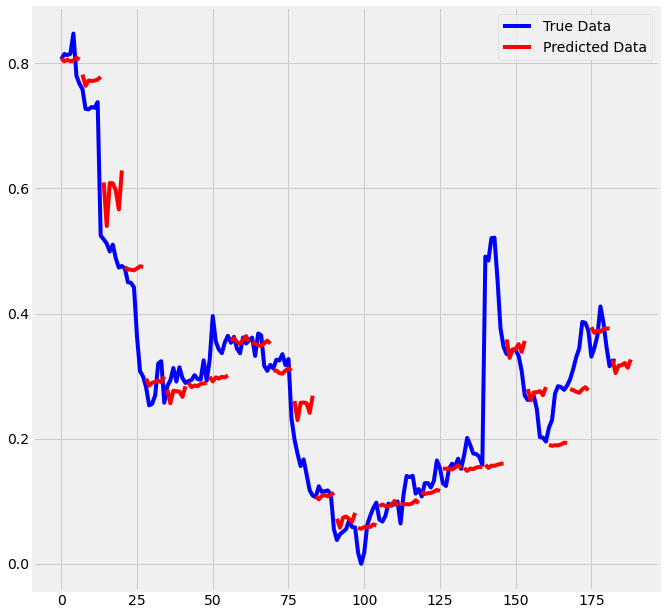

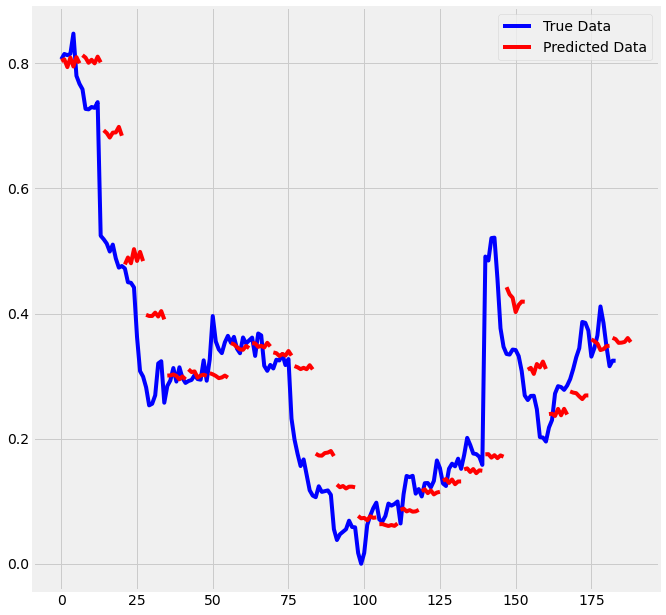

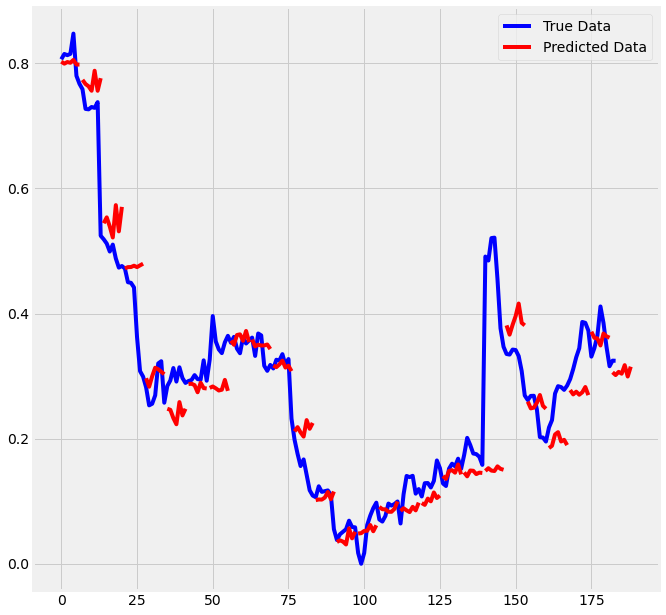

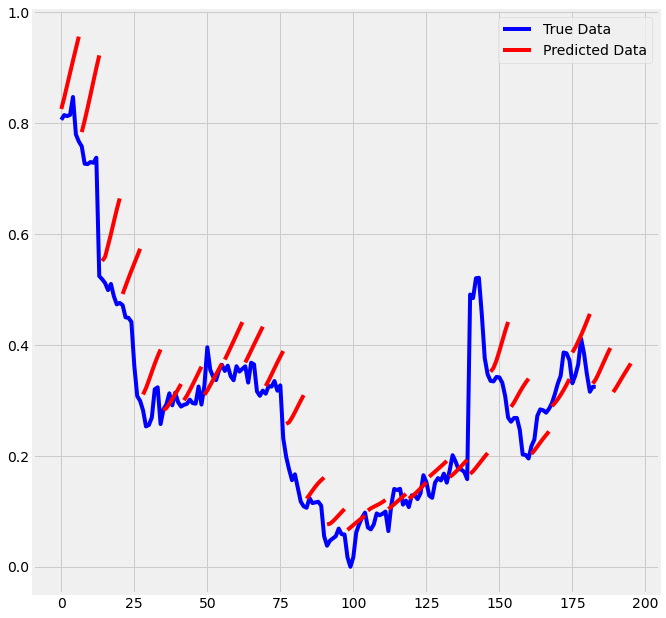

(184, 7)
(184, 7)
(184, 7)
(184, 7)


In [ ]:
def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.show()

def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white', figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data', c='blue')
    #Pad the list of predictions to shift it in the graph to it's correct start
    label = 'Predicted Data'
    for i, data in enumerate(predicted_data):
        if(i%7==0):
            padding = [None for p in range(i * prediction_len)]
            plt.plot(
                np.append(padding, data), c='red', label=label)
            plt.legend()
            label = None
    plt.show()


plot_results_multiple(predicted_GRU, y_test[:,0], 1)
plot_results_multiple(predicted_LSTM, y_test[:,0], 1)
plot_results_multiple(predicted_SimpleRNN, y_test[:,0], 1)
plot_results_multiple(predicted_stupid, y_test[:,0], 1)

print(np.shape(predicted_LSTM))
print(np.shape(predicted_GRU))
print(np.shape(predicted_SimpleRNN))
print(np.shape(y_test))

**Author: Badreddine CHAGUER**
    
**Linkedin: https://www.linkedin.com/in/badreddine-chaguer-631466165/**